
[Classification] activation=identity  Accuracy=0.873
[Classification] activation=tanh      Accuracy=0.950
[Classification] activation=relu      Accuracy=0.943
[Classification] activation=logistic  Accuracy=0.873


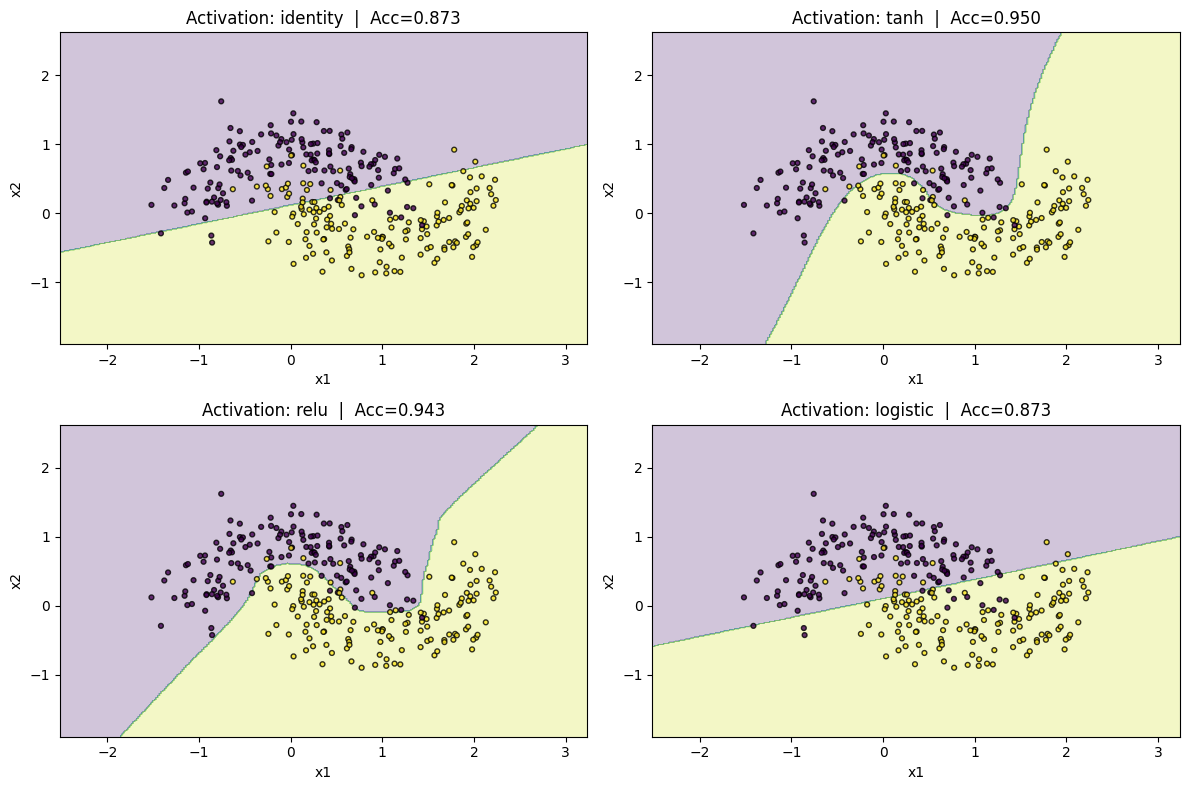

In [2]:
# ---------- CLASSIFICATION: MLPClassifier activations comparison ----------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 2D toy dataset (nice for boundaries)
X, y = make_moons(n_samples=1200, noise=0.25, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

activations = ["identity", "tanh", "relu", "logistic"]
models = []
print()
for act in activations:
    clf = MLPClassifier(
        hidden_layer_sizes=(64, 64),
        activation=act,
        solver="adam",
        learning_rate_init=1e-3,
        max_iter=400,
        random_state=42
    )
    clf.fit(X_train_s, y_train)
    y_pred = clf.predict(X_test_s)
    acc = accuracy_score(y_test, y_pred)
    models.append((act, clf, acc))
    print(f"[Classification] activation={act:8s}  Accuracy={acc:.3f}")

# Plot decision boundaries for each activation
def plot_decision_boundary(ax, model, scaler, X, y, title):
    # grid
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_s = scaler.transform(grid)
    Z = model.predict(grid_s).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.25)
    ax.scatter(X[:,0], X[:,1], c=y, s=12, edgecolor="k", alpha=0.8)
    ax.set_title(title)
    ax.set_xlabel("x1"); ax.set_ylabel("x2")

cols = 2
rows = int(np.ceil(len(models)/cols))
plt.figure(figsize=(12, 4*rows))
for i, (act, clf, acc) in enumerate(models, 1):
    ax = plt.subplot(rows, cols, i)
    plot_decision_boundary(ax, clf, scaler, X_test, y_test,
                           f"Activation: {act}  |  Acc={acc:.3f}")
plt.tight_layout()
plt.show()
